In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import os
from collections import namedtuple

import matplotlib.pyplot as plt 
import cv2 
import json
import numpy as np

import ritnet
import nia22
from glob import glob

from matplotlib.patches import Ellipse
from nia22.scenario import Info
from nia22.mask_utils import gen_mask
from nia22.eyes import Eye

In [5]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [10]:
ddir = "/home/di/Work/data1/NIA2022/ORG/"
vid_dir_base = "/mnt/syn2422/raw/raw/by_id/"

## 1. 샘플 리스트 

1. IR이 어느 정도 믿을만한 클립들 
2. 

In [43]:
code

'S_E_T'

code에 device 정보는 없음... 

In [13]:
for uid in range(9, 35)[:1]:
    uid = f"{uid:03d}"
    pattern = ddir + f"{uid}/*.json"
    json_list = glob(pattern)
    json_list.sort()
    print(f"{len(json_list)} JSON files are found")
    
    ####
    all_scenarios = []
    for jl in json_list:
        code = jl[-14:-9]
        
        all_scenarios.append(code)

    scenario_set = set(all_scenarios)
    
    ####
    for ss in scenario_set:
        file = Info(base_dir = ddir + f"{uid}/", scen = ss)
        file.vid_dir = vid_dir_base + f"{file.id}/T1/{file.device_d}/RGB/"
        fn_vid = file.vid_dir + file.fn_vid


12862 JSON files are found


In [18]:
fn

'NIA22EYE_S1_009_T1_S10_T_rgb_D_L_T_2'

In [19]:
cap = cv2.VideoCapture(fn_vid)
if cap.isOpened():
    for ff, fn_json in file:
        #try:
        if True:
            anno = json.load(open(file._dir + fn_json,"r"))
            cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
            ok, frame = cap.read()
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            fn = file._fn_base + f"_{ff:03d}"
            #err = gen_mask(frame, anno, fn, png_dir, label_dir)
        #except:
        #    print("something wrong", fn_json)
else:
    print("Can't open video file")
    print(">>>", fn_vid)

## 2. JSON 로딩 

In [ ]:
anno = json.load(open(file._dir + fn_json,"r"))

## 3. RGB / IR 비교

In [25]:
eye = Eye(anno["Annotations"]["annotations"])

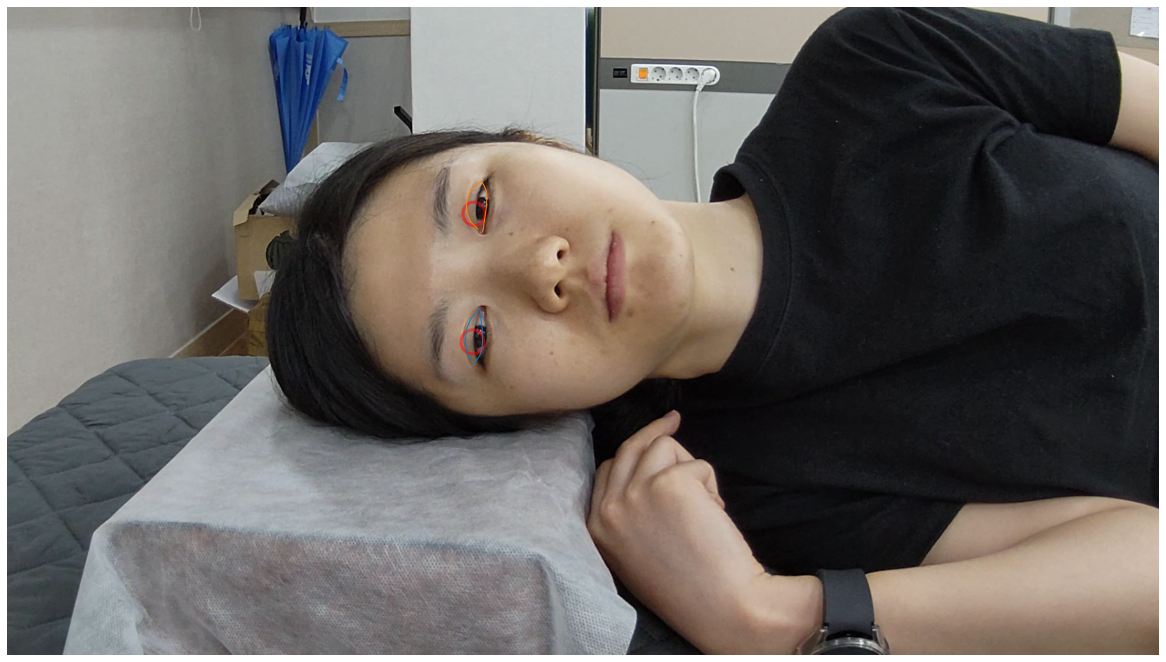

In [42]:
# 2. load image
cap.set(cv2.CAP_PROP_POS_FRAMES, file.frames[0])
ok, img = cap.read()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.close("all")
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
fig.set_size_inches(16,9)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

# 피사체의 왼쪽 눈
iris = eye.l_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse1 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse1)

# 공막
p_left_eye = np.array(eye.l_eyelid['points'])
plt.plot(p_left_eye[:,0], p_left_eye[:,1], lw=1)


#피사체의 오른쪽 눈
iris = eye.r_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse2 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse2)

p_right_eye = np.array(eye.r_eyelid['points'])
plt.plot(p_right_eye[:,0], p_right_eye[:,1], lw=1)

ax.imshow(img)

ax.set_axis_off()

ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)


plt.show()

## 4. RGB -> IR 변환